In [106]:
import numpy as np
import os
import matplotlib.pyplot as ppt
import seaborn as sn
from scipy.stats import chi2_contingency as chiq
from random import randrange, uniform
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
os.getcwd()

'/home/administrator/Documents/project'

os.setcwd('/home/administrator/Documents/project')

In [107]:
os.chdir('/home/administrator/Documents/project')

In [108]:
import pandas as pd
rental_bikes_data=pd.read_csv("day.csv")
rental_bikes_data_for_visual=pd.read_csv("day.csv")

In [109]:
rental_bikes_data

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [110]:
##Exploratory Data Analysis
rental_bikes_data_for_visual["season"]=rental_bikes_data_for_visual["season"].replace(1,"springer")
rental_bikes_data_for_visual["season"]=rental_bikes_data_for_visual["season"].replace(2,"summer")
rental_bikes_data_for_visual["season"]=rental_bikes_data_for_visual["season"].replace(3,"fall")
rental_bikes_data_for_visual["season"]=rental_bikes_data_for_visual["season"].replace(4,"winter")
rental_bikes_data_for_visual["yr"]=rental_bikes_data_for_visual["yr"].replace(0,"2011")
rental_bikes_data_for_visual["yr"]=rental_bikes_data_for_visual["yr"].replace(1,"2012")
rental_bikes_data_for_visual["holiday"]=rental_bikes_data_for_visual["holiday"].replace(1,"yes")
rental_bikes_data_for_visual["holiday"]=rental_bikes_data_for_visual["holiday"].replace(0,"no")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(0,"sun")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(1,"mon")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(2,"tue")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(3,"wed")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(4,"thu")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(5,"fri")
rental_bikes_data_for_visual["weekday"]=rental_bikes_data_for_visual["weekday"].replace(6,"sat")
rental_bikes_data_for_visual["weathersit"]=rental_bikes_data_for_visual["weathersit"].replace(1,"clear or partly cloudy")
rental_bikes_data_for_visual["weathersit"]=rental_bikes_data_for_visual["weathersit"].replace(2,"mist or few clouds")
rental_bikes_data_for_visual["weathersit"]=rental_bikes_data_for_visual["weathersit"].replace(3,"light snow or rain")
rental_bikes_data_for_visual["weathersit"]=rental_bikes_data_for_visual["weathersit"].replace(4,"heavy rain or thunderstorm")




In [111]:

rental_bikes_data_for_visual

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,springer,2011,1,no,sat,0,mist or few clouds,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,springer,2011,1,no,sun,0,mist or few clouds,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,springer,2011,1,no,mon,1,clear or partly cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,springer,2011,1,no,tue,1,clear or partly cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,springer,2011,1,no,wed,1,clear or partly cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,springer,2011,1,no,thu,1,clear or partly cloudy,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,springer,2011,1,no,fri,1,mist or few clouds,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,springer,2011,1,no,sat,0,mist or few clouds,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,springer,2011,1,no,sun,0,clear or partly cloudy,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,springer,2011,1,no,mon,1,clear or partly cloudy,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [112]:
rental_bikes_data["mnth"]=rental_bikes_data["mnth"].astype("category")
rental_bikes_data["season"]=rental_bikes_data["season"].astype("category")
rental_bikes_data["holiday"]=rental_bikes_data["holiday"].astype("category")
rental_bikes_data["yr"]=rental_bikes_data["yr"].astype("category")
rental_bikes_data["weekday"]=rental_bikes_data["weekday"].astype("category")
rental_bikes_data["workingday"]=rental_bikes_data["workingday"].astype("category")
rental_bikes_data["weathersit"]=rental_bikes_data["weathersit"].astype("category")


##outlier analysis



In [113]:
cnames=rental_bikes_data.select_dtypes(include=[np.number]).columns.tolist()
cnames
for i in cnames:
    q75,q25=np.percentile(rental_bikes_data.loc[:,i],[75,25])
    iqr=q75-q25
    minimum=q25-(iqr*1.5)
    maximum=q75+(iqr*1.5)
    rental_bikes_data=rental_bikes_data.drop(rental_bikes_data[rental_bikes_data.loc[:,i]<minimum].index)
    rental_bikes_data=rental_bikes_data.drop(rental_bikes_data[rental_bikes_data.loc[:,i]>maximum].index)

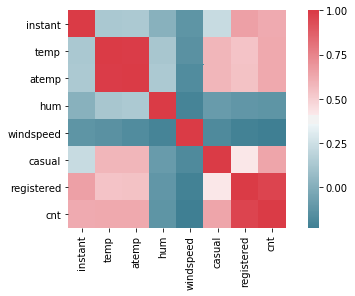

In [114]:
##correlation analysis
##cnames
data_for_correlation=rental_bikes_data.loc[:,cnames]
data_for_correlation
height,width=ppt.subplots(figsize=(8,4))
res=data_for_correlation.corr()
sn.heatmap(res,mask=np.zeros_like(res,dtype=np.bool),cmap=sn.diverging_palette(220,10,as_cmap=True),square=True,ax=width)

In [115]:
##chi square test
categorical_col=rental_bikes_data.select_dtypes(exclude=["int64","float64","object"])

In [116]:
names=categorical_col.columns
names


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit'],
      dtype='object')

In [117]:
for i in names:
    
    chi,p,dof,ex=chiq(pd.crosstab(categorical_col["mnth"].rename("s"),categorical_col[i]))
    #print(chi)
    print(str(i)+"="+str(p))
    #print(dof)
    #print(ex)

season=0.0
yr=0.999693963889634
mnth=0.0
holiday=0.34288651390971203
weekday=0.9999999999999999
workingday=0.6586364687090198
weathersit=0.004181147825270698


In [118]:
###dropping holiday,atemp,instant,dteday
rental_bikes_data=rental_bikes_data.drop(["holiday","atemp","instant","dteday","casual","registered","season"],axis=1)


In [119]:
rental_bikes_data

,yr,mnth,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,6,0,2,0.344167,0.805833,0.160446,985
1,0,1,0,0,2,0.363478,0.696087,0.248539,801
2,0,1,1,1,1,0.196364,0.437273,0.248309,1349
3,0,1,2,1,1,0.200000,0.590435,0.160296,1562
4,0,1,3,1,1,0.226957,0.436957,0.186900,1600
5,0,1,4,1,1,0.204348,0.518261,0.089565,1606
6,0,1,5,1,2,0.196522,0.498696,0.168726,1510
7,0,1,6,0,2,0.165000,0.535833,0.266804,959
8,0,1,0,0,1,0.138333,0.434167,0.361950,822
9,0,1,1,1,1,0.150833,0.482917,0.223267,1321


In [120]:
##decision tree
decision_model=DecisionTreeRegressor().fit(train.iloc[:,0:8],train.iloc[:,8])

In [121]:
decision_predict=decision_model.predict(test.iloc[:,0:8])


In [122]:
decision_predict

array([1996., 3487., 1746., 5062., 4966., 4590., 4966., 3894., 3272.,
       4891., 6784., 1589., 6530., 5305., 5225., 5740., 7870., 1708.,
       3194., 4359., 2252., 5905., 2659., 4258., 3747., 4687., 6421.,
       6904., 6879., 4458., 1834., 3523., 2765., 2277., 3872., 4067.,
       1851., 1321., 4205., 3958., 2566., 6530., 7592., 4040., 6457.,
       4308., 3894., 4375., 1812., 1162., 2114., 6093., 4338., 4352.,
       1851.,  959., 5698., 1851., 7030., 4182., 2311., 7592., 1530.,
       6691., 3922., 4835., 6093., 5191., 4375., 4575., 1807., 2376.,
       3487., 2302., 5740., 2368., 1317., 2832., 4105., 3958., 2792.,
       4727., 7273., 6031., 2832., 5099., 5255., 6290., 2376., 1471.,
       4400., 7347.,  431., 4094., 7175., 4509., 2077., 1891., 2933.,
       3659., 3613., 3523., 7264., 7261., 5035., 5409., 5423., 4342.,
       2034., 1708., 1562., 2493., 4714., 1927., 2294., 5786., 5629.,
       6241., 4339., 5423., 4169., 7058., 4629., 4679., 3831., 5847.,
       5424., 7058.,

In [123]:
def MAPE(y_true, y_pred): 
    mape = np.mean(np.abs((y_true - y_pred) / y_true))*100
    return mape

MAPE(test.iloc[:,8],decision_predict)


21.91884804475648

In [124]:
rms = sqrt(mean_squared_error(test.iloc[:,8],decision_predict))



In [125]:
rms

926.9802055441035

In [126]:
####LinearRegression
import statsmodels.api as sm
linear_regression=sm.OLS(train.iloc[:,8].astype(float),train.iloc[:,0:8].astype(float)).fit()



In [127]:
linear_regression.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     1724.
Date:                Sun, 19 Aug 2018   Prob (F-statistic):               0.00
Time:                        18:39:36   Log-Likelihood:                -4451.8
No. Observations:                 540   AIC:                             8920.
Df Residuals:                     532   BIC:                             8954.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
yr          2030.1810     78.822     25.756      0.000    1875.340    2185.022
mnth         108.6313     12.057      9.010      0.000      84.946     132.317
weekday       86.6796     20.274      4.275      0.000      46.852     126.507
workingday   597.7470     88.695      6.739      0.000     423.512     771.982
weathersit  -657.8865     99.487     -6.613      0.000    -853.323    -462.450
temp        5664.6031    219.302     25.830      0.000    5233.799    6095.407
hum          405.1425    323.394      1.253      0.211    -230.144    1040.429
windspeed   -690.4800    473.883     -1.457      0.146   -1621.391     240.431
==============================================================================
Omnibus:                       72.347   Durbin-Watson:                   1.949
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.942
Skew:                          -0.837   Prob(JB):                     5.47e-27
Kurtosis:                       4.603   Cond. No.                         97.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
linear_predict=linear_regression.predict(test.iloc[:,0:8])



In [129]:
MAPE(test.iloc[:,8],linear_predict)

26.241320291538095

In [98]:
rms = sqrt(mean_squared_error(test.iloc[:,8],linear_predict))

In [99]:
rms


892.0819766035767

In [100]:
##random forest
from sklearn.ensemble import RandomForestRegressor


In [101]:
rf_model=RandomForestRegressor(n_estimators=100).fit(train.iloc[:,0:8],train.iloc[:,8])

In [102]:
rf_predicted=rf_model.predict(test.iloc[:,0:8])

In [103]:
rf_predicted

array([2444.72, 3820.56, 1278.41, 5789.82, 4769.92, 4493.17, 5125.68,
       4200.5 , 2845.03, 4824.7 , 6685.62, 2638.17, 6692.08, 4965.2 ,
       4873.23, 6215.7 , 7652.44, 1608.52, 4237.49, 4429.5 , 2348.38,
       6279.17, 3056.3 , 4587.97, 3255.21, 4709.42, 6405.35, 6096.78,
       7227.01, 4450.08, 5368.  , 3286.33, 2407.71, 3019.57, 4027.49,
       3423.91, 1991.18, 1505.97, 3710.46, 4584.88, 2515.13, 6978.66,
       6926.17, 4117.25, 6339.24, 3809.87, 4294.55, 4364.7 , 1801.69,
       2717.06, 2456.46, 5842.47, 3841.89, 4616.41, 2098.37,  983.26,
       5907.96, 1548.97, 6563.16, 4597.69, 2411.11, 6856.49, 1596.9 ,
       6018.31, 3934.27, 4536.3 , 6058.73, 4541.38, 4377.71, 4540.88,
       1552.  , 3029.99, 4412.81, 2348.77, 5893.65, 2812.77, 2230.02,
       2967.65, 3885.58, 4464.61, 3506.63, 4558.92, 6580.19, 5785.71,
       3151.45, 4967.27, 4972.07, 7173.82, 2539.95, 2600.4 , 4092.27,
       7568.75,  952.21, 4607.5 , 7050.89, 4494.35, 2501.81, 1898.83,
       2285.66, 4336

In [104]:
MAPE(test.iloc[:,8],rf_predicted)

17.869386009390738

In [105]:
rms = sqrt(mean_squared_error(test.iloc[:,8],linear_predict))
rms


892.0819766035767

In [79]:
from sklearn.ensemble import AdaBoostRegressor

In [80]:
ada_model=AdaBoostRegressor(n_estimators=50).fit(train.iloc[:,0:8],train.iloc[:,8])

In [81]:
ada_predict=ada_model.predict(test.iloc[:,0:8])

In [82]:
MAPE(test.iloc[:,8],ada_predict)

23.47749631627394

In [83]:
rms = sqrt(mean_squared_error(test.iloc[:,8],linear_predict))

In [84]:
rms

892.0819766035767